Calibration of the optical lattice depth
====
$$
\def\bra#1{\mathinner{\left\langle{#1}\right|}}
\def\ket#1{\mathinner{\left|{#1}\right\rangle}}
\def\braket#1#2{\mathinner{\left\langle{#1}\middle|#2\right\rangle}}
$$
The initial state of an atom should be $\ket{\Psi(t<0)} = \ket{\boldsymbol{k}=0}$ as the momentum distribution of a BEC has a very sharp peak at $\boldsymbol{k}=0$. A BEC suddenly loaded into a lattice can be described as superposition of Bloch states $\ket{\boldsymbol{q},n}$:
\begin{equation}
\ket{\Psi(t=0)} = \sum_{n=0}^{\infty} \ket{\boldsymbol{q},n} \braket{\boldsymbol{q},n}{ \boldsymbol{k}=0}.   \\
\end{equation}
Recalling 
\begin{equation}
\ket{q,n} = \sum_{m=0,\pm 1, \cdots} \sum_{m'=0,\pm 1, \cdots} A_{m,m'}^{\boldsymbol{q},n} \ket{q_1+m K_1, q_2+m' K_2}, \\
\end{equation}
we get
\begin{equation}
\braket{\boldsymbol{q},n}{\boldsymbol{k}=0} = (A_{m=0,m'=0}^{\boldsymbol{q}=\boldsymbol{0},n})^{\ast}.
\end{equation}
Then, while the BEC wavepacket is held in the lattice, it evolves in time according to
\begin{equation}
\ket{\Psi(t)} = \sum_{n=0}^{\infty} (A_{m=0,m'=0}^{\boldsymbol{q}=\boldsymbol{0},n})^{\ast} {\rm{exp}} \left( -i \frac{E_{\boldsymbol{q},n}}{\hbar} t \right) \ket{\boldsymbol{q},n}. \\
\end{equation}
Projecting the above onto the plane-wave basis, we obtain the coefficients $B_{m,m'}^{\boldsymbol{q}}$ of each $\ket{q_1+mK_1,q_2+m'K_2}$ in the lattice frame:
\begin{equation}
B_{m,m'}^{\boldsymbol{q}} = \sum_{n=0}^{\infty} (A_{l=0,l'=0}^{\boldsymbol{q'}=\boldsymbol{0},n})^{\ast} A_{m,m'}^{\boldsymbol{q}}  \left( -i \frac{E_{\boldsymbol{q},n}}{\hbar} t \right) . \\
\end{equation}
$q$ is a parameter, but usually chosen to zero as momentum of a BEC does not change during pulsed lattice.

Parameters
===

In [1]:
# -*- coding: utf-8 -*-

import numpy as np
lam = 1 # Normalized wavelength
d = lam/2 # lattice constant
k = 2*np.pi/lam # wave number
k1 = k*np.array([0,-1]) # reciprocal lattice vector 1
k2 = k*np.array([np.sqrt(3)/2, 1/2]) # reciprocal lattice vector 2
k3 = k*np.array([-np.sqrt(3)/2, 1/2]) # reciprocal lattice vector 3

v12 = 6 # Depth of Diagonal lattice created by lattice beam 1 and 2
v23 = 6# 
v31 =6

phi12 = 0 # lattice phase 1
phi23 = 0 # lattice phase 2

n = 10 # include (2n+1)^2 plane waves in calculation <=> calculate over (2n+1)^2 bands
m = 8 # calculate over (2m(+1))^2 quasimomenta

Potential landscape
===

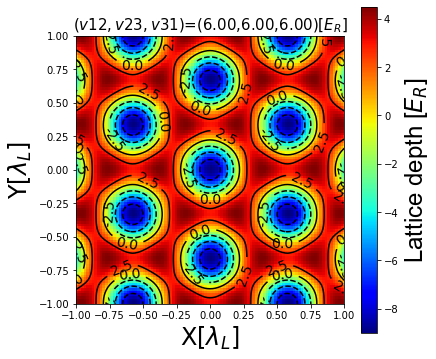

In [2]:
b1 = k2-k3
b2 = k3-k1
b3 = k1-k2

x = np.arange(-1.2,1.2,0.02)
y = np.arange(-1.2,1.2,0.02)
X,Y = np.meshgrid(x,y)
Z = list(map(lambda x,y: -v12/2*np.cos(np.inner(b1,np.array([x,y]).T))-v23/2*np.cos(np.inner(b2,np.array([x,y]).T)+phi12)-v31/2*np.cos(np.inner(b1+b2,np.array([x,y]).T)+phi23), X,Y))

import matplotlib.pyplot as plt
plt.figure(figsize=[6,6])
cont=plt.contour(X,Y,Z,  5, vmax=1,colors=['black'])
cont.clabel(fmt='%1.1f', fontsize=14)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal')
plt.xlabel(r'X[$\lambda_L$]', fontsize=24)
plt.ylabel(r'Y[$\lambda_L$]', fontsize=24)
plt.title(r'$(v12,v23,v31)$=({:.2f},{:.2f},{:.2f})[$E_R$]'.format(v12,v23,v31), fontsize=15)

plt.pcolormesh(X,Y,Z, cmap='jet') #カラー等高線図
pp=plt.colorbar (orientation="vertical") # カラーバーの表示 
pp.set_label("Lattice depth [$E_R$]", fontname="Arial", fontsize=24) #カラーバーのラベル

Hamiltonian
===

In [3]:
nq_list = np.array([(0,0)])

Nsite=2*n+1
l_list = [(x, y) for x in np.linspace(-n, n, Nsite, dtype=np.int) for y in np.linspace(-n, n, Nsite, dtype=np.int)]
E = np.zeros([len(nq_list), Nsite**2])
C = np.zeros([Nsite**2, len(nq_list), Nsite**2])
H_tmp = np.zeros([Nsite**2, Nsite**2])

l_list_1 = np.array(l_list)[:, 0]
l_list_2 = np.array(l_list)[:, 1]
l2, l1 = np.meshgrid(l_list_1, l_list_1)
m2, m1 = np.meshgrid(l_list_2, l_list_2)

l_diffs_1 = l1 - l2
l_diffs_2 = m1 - m2
l_diffs = l_diffs_1 * l_diffs_2
condition_1 = (np.abs(l_diffs_1) == 1) * (m1 == m2)
condition_2 = (l1 == l2) * (np.abs(l_diffs_2) == 1)
condition_3 = (l_diffs == 1)

H_tmp[condition_1 == 1] = -v12/4
H_tmp[condition_2 == 1] += -v23/4
H_tmp[condition_3 == 1] += -v31/4

for i_n, n_temp in enumerate(nq_list):
    H = np.copy(H_tmp)
    K = 3 * ((n_temp[0] - l1)**2 + (n_temp[1] - m1)**2 - (n_temp[0] - l2) * (n_temp[1] - m2))
    H += ((l1 == l2) * (m1 == m2)) * K
    E0, P = np.linalg.eig(H)
    rearrangedEvalsVecs = sorted(zip(E0, P.T), key=lambda x: x[0].real, reverse=False)
    E[i_n, :], tmp = map(list, zip(*rearrangedEvalsVecs))
    C[:, i_n, :] = np.array(tmp)

<ipython-input-3-d65a8ea1cf8d>:31: ComplexWarning: Casting complex values to real discards the imaginary part
  E[i_n, :], tmp = map(list, zip(*rearrangedEvalsVecs))
<ipython-input-3-d65a8ea1cf8d>:32: ComplexWarning: Casting complex values to real discards the imaginary part
  C[:, i_n, :] = np.array(tmp)


Definition of Physical constant
---

In [4]:
lambda_L = 1064*10**(-9) #wave lenght of triangular lattice beam [m] 
h_bar = 1.054571596*10**(-34) #Converted Plank const
mrb = 87*1.66053873*10**(-27) #Single atom mass of 87Rb
er = h_bar**2/(2*mrb)*(2*np.pi/lambda_L)**2 #Recoil energy of 1064nm lattice

Calculation of Band gap
---

In [5]:
upper_band_index = 7
band_index_list = range(1,upper_band_index)
gap=list(map(lambda x: (E[0,x]-E[0,0])*er/(h_bar*2*np.pi), band_index_list)) #gap[Hz]
period_list = list(map(lambda x: "{:.2f}".format(1/gap[x]*10**6),range(len(band_index_list))))
gap_name_list = list(map(lambda x:"n=1 to " + str(x+1) + r": $\tau$ ="+period_list[x-1]+r"[$\mu s$]", band_index_list ))


Time evolution according to Schrodinger eq.
---

In [6]:
t = np.linspace(0,300,200)
m_list = [(0,0),(0,1),(1,0),(0,-1),(-1,0),(1,1),(-1,-1),(-1,1),(1,-1),(2,1),(1,2),(-2,-1),(-1,-2)]

pm = np.zeros([len(t),len(m_list)])


for i_t, tp in enumerate(t):
    for i_m, mp in enumerate(m_list):
        pm[i_t,i_m] =np.abs(np.sum(P[Nsite*(n+mp[0])+n+mp[1],:]*P[Nsite*n+n,:]*np.exp(-1.j*E0*er/h_bar*tp*10**(-6))))**2 

Plot results
===

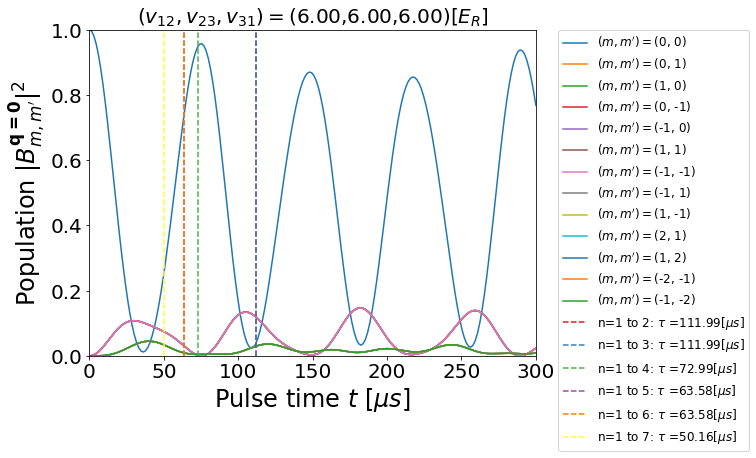

In [7]:
import matplotlib.pyplot as plt
colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf']
depth_label = "({:.2f},{:.2f},{:.2f})".format(v12,v23,v31)
plt.figure(figsize=[8,6])
list(map(lambda x: plt.plot(t,pm[:,x],label=r"$(m,m^{\prime})=$"+str(m_list[x])), range(len(m_list))))
plt.xlim(min(t),max(t))
plt.ylim(0,1)
plt.xlabel(r'Pulse time $t$ [$\mu s$]', fontsize=24)
plt.ylabel(r'Population $|B_{m,m^{\prime}}^{\bf{q}=\bf{0}}|^2$', fontsize=24)
plt.xticks(fontsize="20")
plt.yticks(fontsize="20")
plt.title(r'$(v_{12},v_{23},v_{31})=$'+depth_label+r'[$E_R$]', fontsize=20)
list(map(lambda x: plt.axvline(x=1/gap[x]*10**6, label=gap_name_list[x],c=colorlist[x],linestyle='--') , range(len(band_index_list))))
lg=plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
lg.get_title().set_fontsize(15)


In [8]:
import scipy.optimize

para_ini=[1,90,0.5]

def nonlinear_fit(x,a,tau,d):
    return a*np.cos(2*np.pi/tau*x)+d
param, cov=scipy.optimize.curve_fit(nonlinear_fit, t, pm[:,0], para_ini)
perr = np.sqrt(np.diag(cov));
print("a=",str(param[0]))
print("f=",str(param[1]))
print("d=",str(param[2]))

a= -0.05763114343156471
f= 87.66595260693805
d= 0.48817060481739394


[[<matplotlib.lines.Line2D at 0x7f8c90e3f550>],

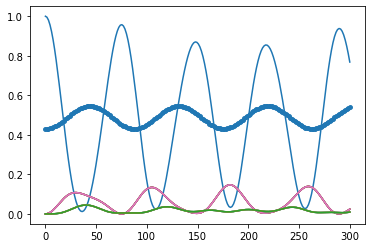

In [9]:
list_x=t
list_y=[]
for num in list_x:
    list_y.append(param[0]*np.cos(2*np.pi/param[1]*num)+param[2])
plt.scatter(list_x,list_y,s=15)
list(map(lambda x: plt.plot(t,pm[:,x],label=r"$(m,m^{\prime})=$"+str(m_list[x])), range(len(m_list))))


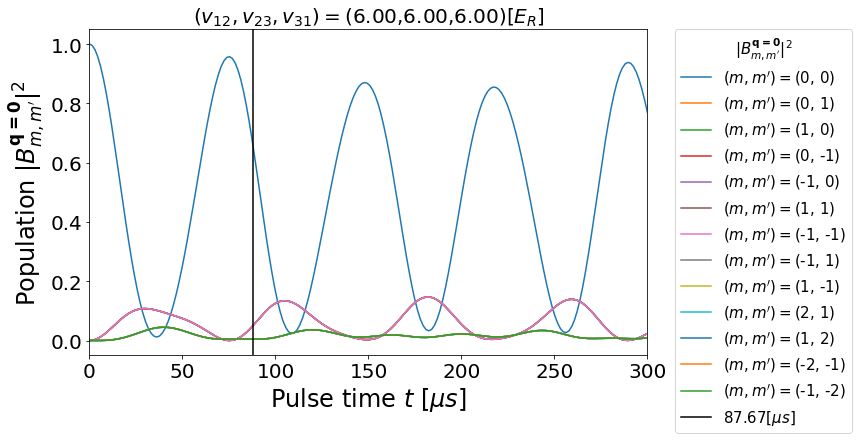

In [10]:
import matplotlib.pyplot as plt
depth_label = "({:.2f},{:.2f},{:.2f})".format(v12,v23,v31)
plt.figure(figsize=[10,6])
list(map(lambda x: plt.plot(t,pm[:,x],label=r"$(m,m^{\prime})=$"+str(m_list[x])), range(len(m_list))))
plt.xlim(min(t),max(t))
plt.xlabel(r'Pulse time $t$ [$\mu s$]', fontsize=24)
plt.ylabel(r'Population $|B_{m,m^{\prime}}^{\bf{q}=\bf{0}}|^2$', fontsize=24)
plt.xticks(fontsize="20")
plt.yticks(fontsize="20")
plt.title(r'$(v_{12},v_{23},v_{31})=$'+depth_label+r'[$E_R$]', fontsize=20)
plt.axvline(x=param[1], label=r"{:.2f}$[\mu s]$".format(param[1]),color ="black")
lg=plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=15, title=r'$|B_{m,m^{\prime}}^{\bf{q}=\bf{0}}|^2$')
lg.get_title().set_fontsize(15)

